In [2]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
pw14_ini=pd.read_csv('homeF_2014_merge_2.csv')
pw15_ini=pd.read_csv('homeF_2015_merge_2.csv')

In [4]:
pw14_ini.head()

,Date & Time,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01 00:00:00,0.977402,0.009264,0.296840,0.009264,0.059256,0.002800,0.008474,0.000531,0.020002,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
1,2014-01-01 00:15:00,0.377746,0.009904,0.063231,0.009904,0.003734,0.002914,0.008633,0.000471,0.009642,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
2,2014-01-01 00:30:00,0.420196,0.010133,0.001511,0.010133,0.121228,0.002630,0.008059,0.000044,0.000011,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
3,2014-01-01 00:45:00,0.290328,0.010029,0.000058,0.010029,0.016986,0.002910,0.008511,0.000411,0.000202,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
4,2014-01-01 01:00:00,0.307616,0.010038,0.000127,0.010038,0.014140,0.002691,0.008500,0.000400,0.000200,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0


In [5]:
pw = pd.concat([pw14_ini,pw15_ini],axis=0,ignore_index=True)

In [6]:
pw.head()

,Date & Time,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01 00:00:00,0.977402,0.009264,0.296840,0.009264,0.059256,0.002800,0.008474,0.000531,0.020002,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
1,2014-01-01 00:15:00,0.377746,0.009904,0.063231,0.009904,0.003734,0.002914,0.008633,0.000471,0.009642,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
2,2014-01-01 00:30:00,0.420196,0.010133,0.001511,0.010133,0.121228,0.002630,0.008059,0.000044,0.000011,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
3,2014-01-01 00:45:00,0.290328,0.010029,0.000058,0.010029,0.016986,0.002910,0.008511,0.000411,0.000202,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
4,2014-01-01 01:00:00,0.307616,0.010038,0.000127,0.010038,0.014140,0.002691,0.008500,0.000400,0.000200,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0


In [7]:
#將標題儲存下來
cols=pw.columns

In [8]:
#概況
target='Usage [kW]'
pw[target].describe()

count    70080.000000
mean         1.315627
std          1.459243
min          0.000000
25%          0.438579
50%          0.815740
75%          1.284938
max         20.819441
Name: Usage [kW], dtype: float64

In [9]:
#先將Usage的數據儲存下來並且drop掉NaN,與最後一個小時的數據

empty = pd.DataFrame(columns=['Usage [kW]']) #造一個空的dataframe
X=pw[['Usage [kW]']]
Past1=X.drop([35040,70073,70074,70075,70076,70077,70078,70079,70080,70081])
Next1=X.drop([0,1,2,3,4,5,6,7,35040,70081])
Past = pd.concat([empty,Past1],axis=0,ignore_index=True)
Next = pd.concat([empty,Next1],axis=0,ignore_index=True)
Past=Past.values
Next=Next.values

In [10]:
#drop掉最初一個小時的數據以及NaN

pw_empty=pd.DataFrame(columns=cols)#造一個空的dataframe
pw_t=pw.drop([0,1,2,3,35040,70077,70078,70079,70080,70081 ])
pw_= pd.concat([pw_empty,pw_t],axis=0,ignore_index=True)

In [11]:
#再將Past集合加入dataframe 就成為前一個小時的電量了
New_pw=pd.concat([pw_, pd.DataFrame(columns=list(['an_hour_Past_Usage [kW]','an_hour_Next_Usage [kW]']))])#將空的一個小時前欄位加入
New_pw['an_hour_Past_Usage [kW]']=Past  #將資料加入上述欄位
New_pw['an_hour_Next_Usage [kW]']=Next
#重新排序欄位
last_col = New_pw.pop(New_pw.columns[-1])
New_pw.insert(2, last_col.name, last_col)
last_col = New_pw.pop(New_pw.columns[-1])
New_pw.insert(3, last_col.name, last_col)
New_pw.head()

,Date & Time,Usage [kW],an_hour_Next_Usage [kW],an_hour_Past_Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01 01:00:00,0.307616,0.378931,0.977402,0.010038,0.000127,0.010038,0.014140,0.002691,0.008500,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
1,2014-01-01 01:15:00,0.396122,0.301320,0.377746,0.010278,0.001511,0.010278,0.124819,0.002258,0.008111,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
2,2014-01-01 01:30:00,0.272560,0.280731,0.420196,0.010127,0.000118,0.010127,0.002522,0.002678,0.008587,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
3,2014-01-01 01:45:00,0.320803,0.456980,0.290328,0.010244,0.000298,0.010244,0.023630,0.002581,0.008497,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
4,2014-01-01 02:00:00,0.378931,0.448540,0.307616,0.010218,0.001389,0.010218,0.114904,0.002516,0.008121,...,10.0,Clear,8.99,1024.41,7.65,0.0,257.0,0.0,3.62,0.0


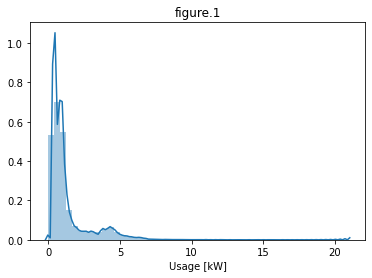

In [12]:
#查看電量大小分布圖
plt.title("figure.1")
sns.distplot(pw[target]);

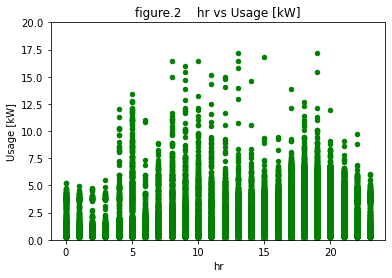

In [13]:
var = 'hr'
data = pd.concat([New_pw[target], New_pw[var]], axis=1)
data.plot.scatter(x=var, y=target, ylim=(0,20),c = 'green');
plt.title("figure.2    hr vs Usage [kW]")
var = 'hr'

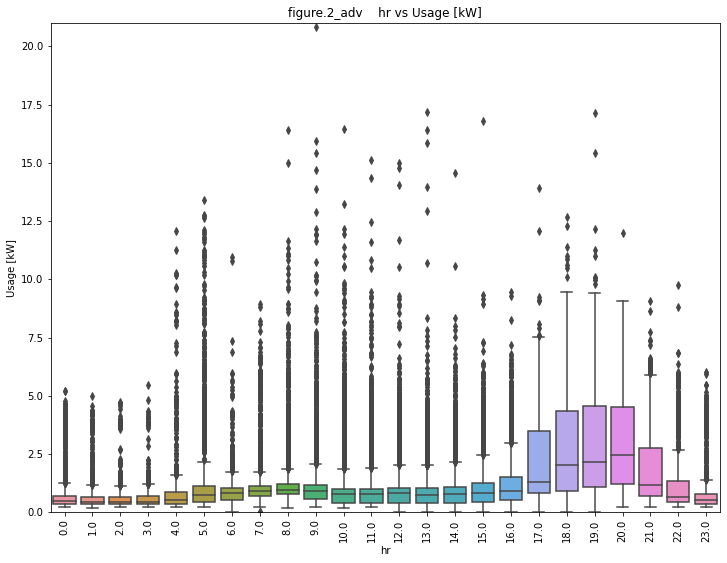

In [14]:
var = 'hr'
data = pd.concat([New_pw[target], New_pw[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x=var, y=target, data=data)
fig.axis(ymin=0, ymax=21);
plt.title("figure.2_adv    hr vs Usage [kW]")
plt.xticks(rotation=90);

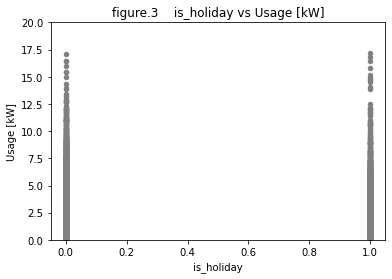

In [15]:
var = 'is_holiday'
data = pd.concat([New_pw[target], New_pw[var]], axis=1)
data.plot.scatter(x=var, y=target, ylim=(0,20),c = 'grey');
plt.title("figure.3    is_holiday vs Usage [kW]")
var = 'is_holiday'


In [16]:
#假日平均用電量
fliter1 = (New_pw["is_holiday"] == 1)
X=New_pw[fliter1]#篩選出假日的data
x=X['Usage [kW]'].mean()

#平日平均用電量
fliter2 = (New_pw["is_holiday"] == 0)
Y=New_pw[fliter2]#篩選出假日的data
y=Y['Usage [kW]'].mean()

print('假日平均用電量 : ',x)
print('平日平均用電量 : ',y)

假日平均用電量 :  1.17770993946063
平日平均用電量 :  1.3706771030265223


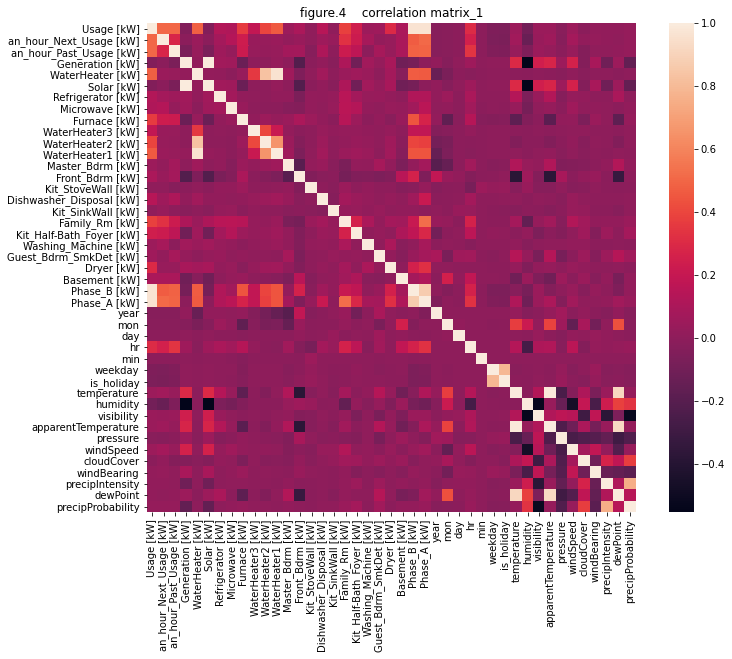

In [17]:
#correlation matrix
corrmat = New_pw.corr()
f, ax = plt.subplots(figsize=(12, 9))
plt.title("figure.4    correlation matrix_1")
sns.heatmap(corrmat, vmax=1, square=True);

In [18]:
New_pw=New_pw.drop([ 'Generation [kW]', 'WaterHeater [kW]',
       'Solar [kW]', 'Refrigerator [kW]', 'Microwave [kW]', 'Furnace [kW]',
       'WaterHeater3 [kW]', 'WaterHeater2 [kW]', 'WaterHeater1 [kW]',
       'Master_Bdrm [kW]', 'Front_Bdrm [kW]', 'Kit_StoveWall [kW]',
       'Dishwasher_Disposal [kW]', 'Kit_SinkWall [kW]', 'Family_Rm [kW]',
       'Kit_Half-Bath_Foyer [kW]', 'Washing_Machine [kW]',
       'Guest_Bdrm_SmkDet [kW]', 'Dryer [kW]', 'Basement [kW]', 'Phase_B [kW]',
       'Phase_A [kW]'], axis=1)

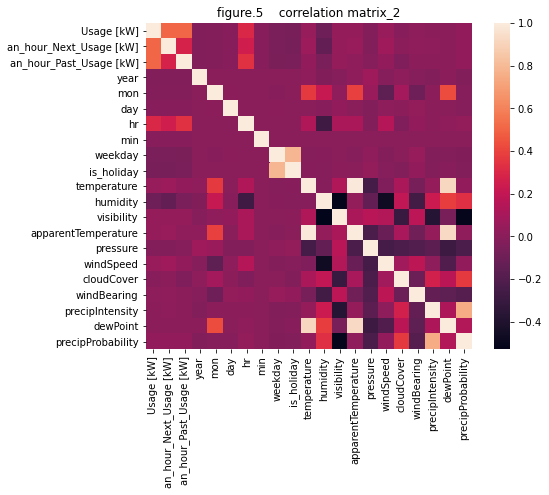

In [19]:

corrmat = New_pw.corr()
f, ax = plt.subplots(figsize=(8, 6))
plt.title("figure.5    correlation matrix_2")
sns.heatmap(corrmat, vmax=1, square=True);

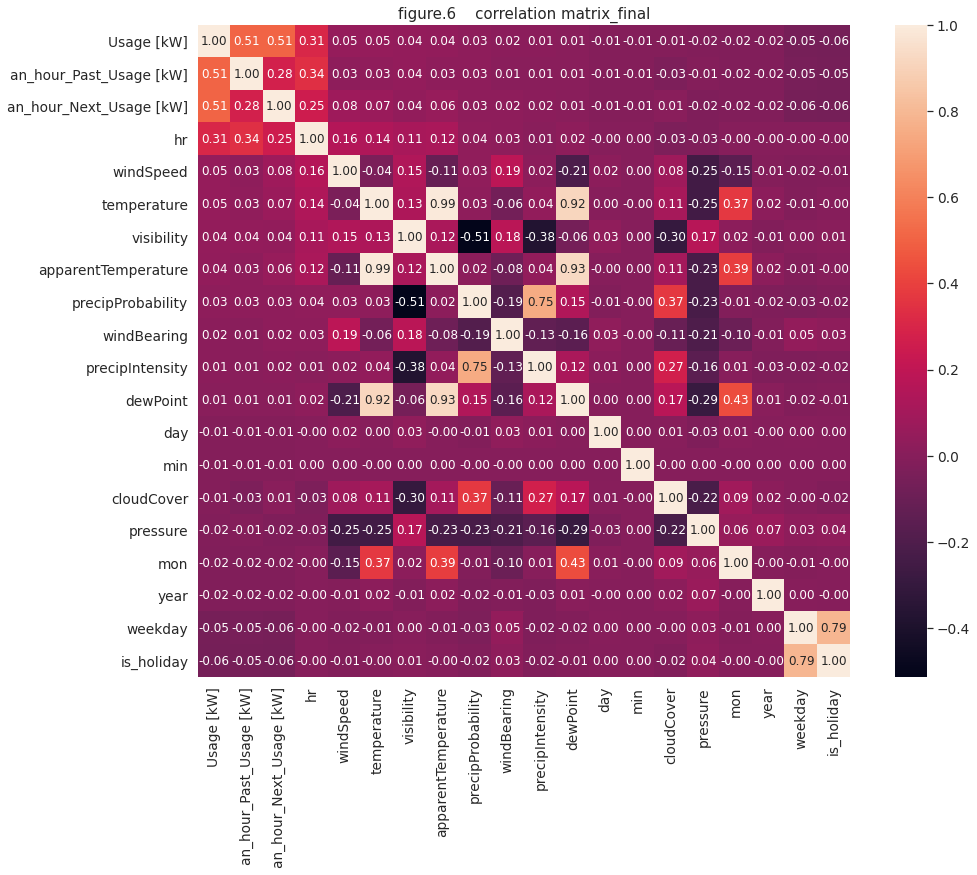

In [20]:
##Usage[kW] correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, target)[target].index
cm = New_pw[cols].corr()
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(16,12 ))
hm = sns.heatmap(cm,vmax=1, cbar=True, annot=True, square=True,linewidths=0, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("figure.6    correlation matrix_final")
plt.show()

In [26]:
empty = pd.DataFrame(columns=['temperature','visibility','apparentTemperature','windSpeed']) #造一個空的dataframe
X=pw[['temperature','visibility','apparentTemperature','windSpeed']]
Past1=X.drop([35040,70073,70074,70075,70076,70077,70078,70079,70080,70081])
Past = pd.concat([empty,Past1],axis=0,ignore_index=True)
Past_t=Past['temperature'].values
Past_v=Past['visibility'].values
Past_a=Past['apparentTemperature'].values
Past_w=Past['windSpeed'].values


In [28]:

#再將Past集合加入dataframe 就成為前一個小時的電量了
New_pw=pd.concat([New_pw, pd.DataFrame(columns=list(['Past_temperature','Past_visibility','Past_apparentTemperature','Past_windSpeed']))])#將空的一個小時前欄位加入

#將資料加入上述欄位
New_pw['Past_temperature']=Past_t
New_pw['Past_visibility']=Past_v
New_pw['Past_apparentTemperature']=Past_a
New_pw['Past_windSpeed']=Past_w

#重新排序欄位
for i in range(0,4):
     last_col = New_pw.pop(New_pw.columns[-1])
     New_pw.insert(2, last_col.name, last_col)

New_pw.head()

,Date & Time,Usage [kW],windBearing,precipIntensity,dewPoint,precipProbability,Past_temperature,Past_visibility,Past_apparentTemperature,Past_windSpeed,...,time,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover
0,2014-01-01 01:00:00,0.307616,285.0,0.0,2.94,0.0,20.85,10.0,8.33,12.83,...,1388556000,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.0
1,2014-01-01 01:15:00,0.396122,285.0,0.0,2.94,0.0,20.85,10.0,8.33,12.83,...,1388556900,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.0
2,2014-01-01 01:30:00,0.272560,285.0,0.0,2.94,0.0,20.85,10.0,8.33,12.83,...,1388557800,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.0
3,2014-01-01 01:45:00,0.320803,285.0,0.0,2.94,0.0,20.85,10.0,8.33,12.83,...,1388558700,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.0
4,2014-01-01 02:00:00,0.378931,257.0,0.0,3.62,0.0,19.72,10.0,8.49,10.03,...,1388559600,18.75,clear-night,0.51,10.0,Clear,8.99,1024.41,7.65,0.0


In [31]:
Y=[]
X=New_pw['hr'].values
for i in range(0, 70072): 
    if (X[i] >= 17)and(X[i] <=21) :
        Y.append(1)
    else :
        Y.append(0)


In [35]:
New_pw=pd.concat([New_pw, pd.DataFrame(columns=list(['is_Peak period']))])#將空的一個小時前欄位加入
New_pw['is_Peak period']=Y
last_col = New_pw.pop(New_pw.columns[-1])
New_pw.insert(2, last_col.name, last_col)
New_pw.head()

,Date & Time,Usage [kW],is_Peak period,windBearing,precipIntensity,dewPoint,precipProbability,Past_temperature,Past_visibility,Past_apparentTemperature,...,time,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover
0,2014-01-01 01:00:00,0.307616,0,285.0,0.0,2.94,0.0,20.85,10.0,8.33,...,1388556000,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.0
1,2014-01-01 01:15:00,0.396122,0,285.0,0.0,2.94,0.0,20.85,10.0,8.33,...,1388556900,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.0
2,2014-01-01 01:30:00,0.272560,0,285.0,0.0,2.94,0.0,20.85,10.0,8.33,...,1388557800,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.0
3,2014-01-01 01:45:00,0.320803,0,285.0,0.0,2.94,0.0,20.85,10.0,8.33,...,1388558700,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.0
4,2014-01-01 02:00:00,0.378931,0,257.0,0.0,3.62,0.0,19.72,10.0,8.49,...,1388559600,18.75,clear-night,0.51,10.0,Clear,8.99,1024.41,7.65,0.0


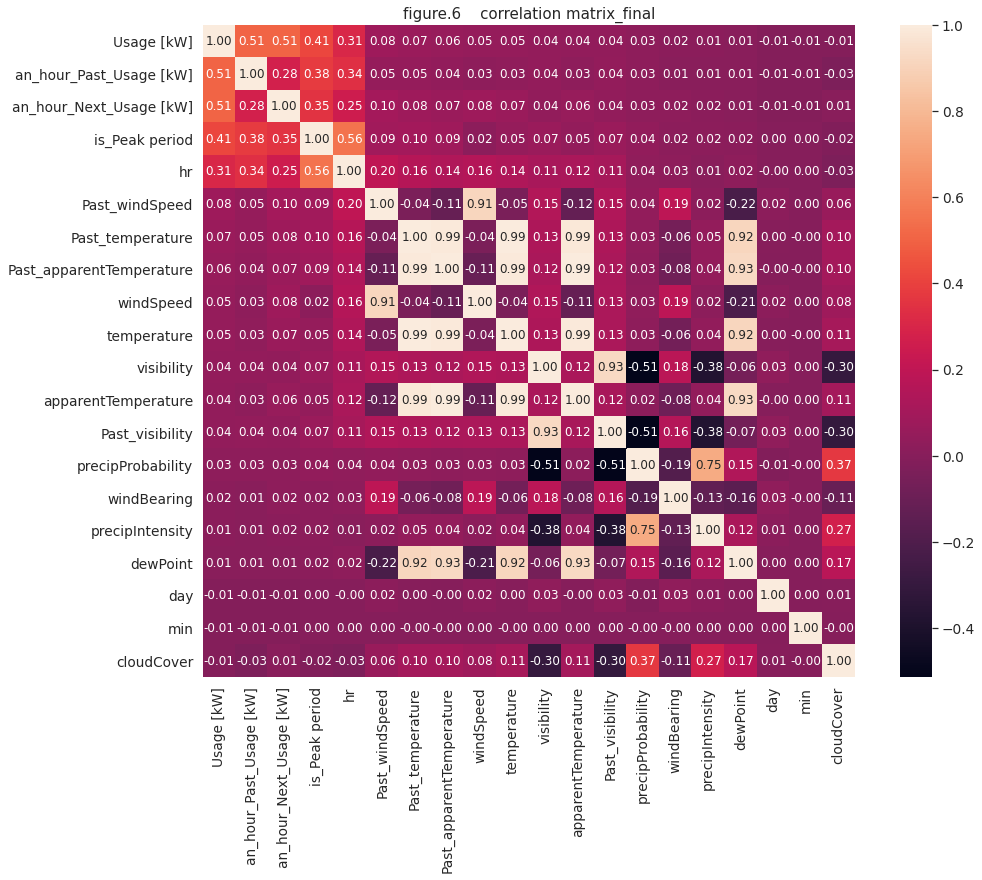

In [36]:

corrmat = New_pw.corr()
##Usage[kW] correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, target)[target].index
cm = New_pw[cols].corr()
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(16,12 ))
hm = sns.heatmap(cm,vmax=1, cbar=True, annot=True, square=True,linewidths=0, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("figure.6    correlation matrix_final")
plt.show()

In [37]:
#將資料分成屬性及標籤
X = New_pw[['time','an_hour_Past_Usage [kW]','is_Peak period','hr', 'is_holiday','Past_temperature','Past_visibility','Past_apparentTemperature']]
Y = New_pw['Usage [kW]']

In [38]:
X1 = New_pw[['Date & Time','time','is_Peak period','an_hour_Past_Usage [kW]','hr', 'is_holiday','Past_temperature','Past_visibility','Past_apparentTemperature']]
Y1 = New_pw[['Date & Time','Usage [kW]']]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.167,shuffle=False)

In [39]:

#建立訓練集和測試集

#2014年1月~2015年8月為訓練集,2015年9月~2015年12月為測試集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.167,shuffle=False)

In [40]:
#建立並訓練模型
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
Y_pred=regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(25) #顯示實際值和預測值
df

,Actual,Predicted
58369,0.395950,0.776424
58370,0.398181,0.740252
58371,0.323748,0.794859
58372,0.415489,0.740130
58373,0.352773,0.770635
...,...,...
70067,1.899674,3.761523
70068,1.795777,2.634235
70069,1.843496,1.610717
70070,1.983620,1.336890


In [44]:

from matplotlib.dates import YearLocator, MonthLocator, DayLocator
from matplotlib.dates import drange, DateLocator, DateFormatter
from matplotlib.dates import HourLocator, MinuteLocator, SecondLocator
from datetime import datetime

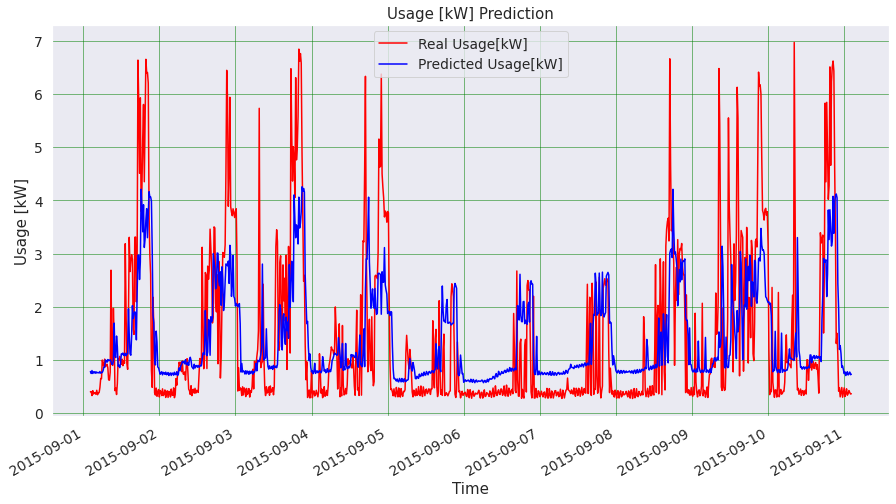

In [45]:
#測試集第一個data 2015-09-01 02:15:00
X_plt=New_pw[New_pw['Date & Time'].between('2015-09-01 02:15:00','2015-09-11 02:15:00')]
X_plt=X_plt['Date & Time']

xs = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in X_plt]


days=mdates.DayLocator()
hours = mdates.HourLocator()

dateFmt = mdates.DateFormatter('%Y-%m-%d')


# format the ticks
ax.xaxis.set_major_locator(days)  # 设置主要刻度
ax.xaxis.set_minor_locator(hours)  # 设置主要刻度
ax.xaxis.set_major_formatter(dateFmt)  # 刻度标志格式

Y_test_plt=Y_test.iloc[0:961]
Y_pred_plt=Y_pred[0:961]


fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)    # 获得设置方法
ax.xaxis.set_major_locator(days)  # 设置主要刻度
ax.xaxis.set_minor_locator(hours)  # 设置主要刻度
ax.xaxis.set_major_formatter(dateFmt)  # 刻度标志格式

plt.plot(xs,Y_test_plt, color = 'red', label = 'Real Usage[kW]')  # 紅線表示Usage
plt.plot(xs,Y_pred_plt, color = 'blue', label = 'Predicted Usage[kW]')  # 藍線表示預測Usage
plt.title('Usage [kW] Prediction')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.xlabel('Time')
plt.ylabel('Usage [kW]')
plt.legend()
#fig.autofmt_xdate()  # 自动格式化显示方式
plt.gcf().autofmt_xdate() 
plt.show()

 
#視覺化


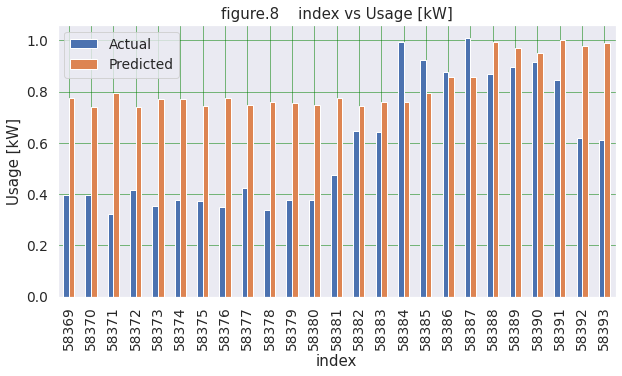

In [46]:
print(' ')
print('#視覺化')
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('index')
plt.ylabel("Usage [kW]")
plt.title("figure.8    index vs Usage [kW]")
plt.show()

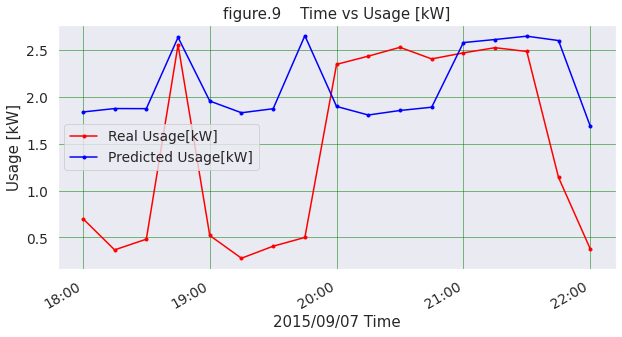

In [48]:
#取2015-09-7 18:00:00'到'2015-09-7 22:00:00的data

X_plt=New_pw[New_pw['Date & Time'].between('2015-09-07 18:00:00','2015-09-07 22:00:00')]
X_plt=X_plt['Date & Time']

xs = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in X_plt]

dateFmt = mdates.DateFormatter('%H:%M')

hours = mdates.HourLocator()
minutes = mdates.MinuteLocator()

Y_test_plt=Y_test.iloc[639:656]
Y_pred_plt=Y_pred[639:656]

# format the ticks
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)    # 获得设置方法
ax.xaxis.set_major_locator(hours)  # 设置主要刻度
ax.xaxis.set_minor_locator(minutes)  # 设置主要刻度
ax.xaxis.set_major_formatter(dateFmt)  # 刻度标志格式

plt.plot(xs,Y_test_plt,'-', marker='.', color = 'red', label = 'Real Usage[kW]')  # 紅線表示Usage
plt.plot(xs,Y_pred_plt,'-', marker='.', color = 'blue', label = 'Predicted Usage[kW]')  # 藍線表示預測Usage
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.xlabel('2015/09/07 Time')
plt.ylabel("Usage [kW]")
plt.title("figure.9    Time vs Usage [kW]")
plt.legend()
plt.gcf().autofmt_xdate() 
plt.show()

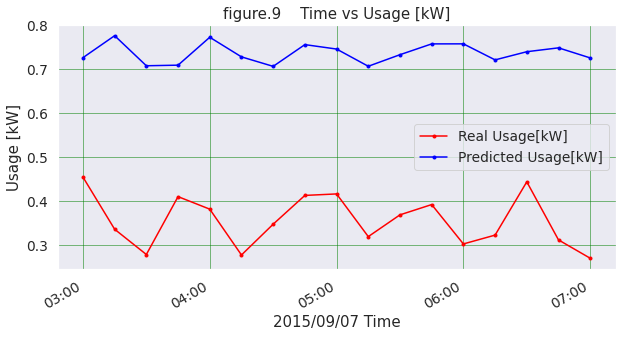

In [50]:

#取2015-09-7 3:00:00'到'2015-09-7 7:00:00的data

X_plt=New_pw[New_pw['Date & Time'].between('2015-09-07 03:00:00','2015-09-07 07:00:00')]
X_plt=X_plt['Date & Time']

xs = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in X_plt]

dateFmt = mdates.DateFormatter('%H:%M')

hours = mdates.HourLocator()
minutes = mdates.MinuteLocator()

Y_test_plt=Y_test.iloc[579:596]
Y_pred_plt=Y_pred[579:596]


# format the ticks
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)    # 获得设置方法
ax.xaxis.set_major_locator(hours)  # 设置主要刻度
ax.xaxis.set_minor_locator(minutes)  # 设置主要刻度
ax.xaxis.set_major_formatter(dateFmt)  # 刻度标志格式

plt.plot(xs,Y_test_plt,'-', marker='.', color = 'red', label = 'Real Usage[kW]')  # 紅線表示Usage
plt.plot(xs,Y_pred_plt,'-', marker='.', color = 'blue', label = 'Predicted Usage[kW]')  # 藍線表示預測Usage
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.xlabel('2015/09/07 Time')
plt.ylabel("Usage [kW]")
plt.title("figure.9    Time vs Usage [kW]")
plt.legend()
plt.gcf().autofmt_xdate() 
plt.show()


In [51]:
#平均絕對誤差(MAE)、均方誤差(MSE)、均方根誤差(RMSE)
print('*Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print(' ')  
print('檢查準確度: ',regressor.score(X_train, Y_train))

*Mean Absolute Error: 0.6219131002966021
Mean Squared Error: 0.9383337635180818
Root Mean Squared Error: 0.9686762944957835
 
檢查準確度:  0.30178937053593924


In [53]:
print('*Mean Absolute Error:', metrics.mean_absolute_error(New_pw['Usage [kW]'],New_pw['an_hour_Next_Usage [kW]']))


*Mean Absolute Error: 0.7170145320543154


In [54]:
#假設為2015年12月31號22:45分的下一個小時=2015年12月31號23:45分溫度為20度
data = {'time':[1451619900],'is_Peak period':[0],'an_hour_Past_Usage [kW]':[1.899674],'hr':[23],
       'is_holiday':[0],'Past_temperature':[37.30],'Past_visibility':[10],'Past_apparentTemperature':[29.58]}
next_hours_data = pd.DataFrame(data)
next_hours_data


,time,is_Peak period,an_hour_Past_Usage [kW],hr,is_holiday,Past_temperature,Past_visibility,Past_apparentTemperature
0,1451619900,0,1.899674,23,0,37.3,10,29.58
